In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np
sns.set_style("darkgrid")
%matplotlib inline
from sklearn.ensemble import IsolationForest
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pickle
import joblib

In [14]:
def data_process(data_frame,batch_size=5110):
    before = 0
    train_data = pd.DataFrame([[]])
    for i in tqdm(range(batch_size,len(data_frame),batch_size)):
        features = pd.DataFrame(get_features(data_frame[before:i]),
                                columns = ['mean','std','min','first_quartile','median','third_quartile','max'])
        before = i
        train_data = train_data.append(features,ignore_index=True)
        
    return train_data[1:]

In [15]:
def get_features(train_data):
    describe = train_data.describe(include='all')
    mean = describe.loc['mean']
    std = describe.loc['std'] #표준편차,
    min = describe.loc['min'] 
    first_quartile= describe.loc['25%']
    median = describe.loc['50%']
    third_quartile = describe.loc['75%']
    max = describe.loc['max'] 
    
    return [[mean,std,min,first_quartile,median,third_quartile,max]]

In [16]:
def pca(train_data,dimension = 2):
    pca = PCA(n_components=dimension)
    printcipalComponents = pca.fit_transform(train_data)
    principalDf = pd.DataFrame(data=printcipalComponents, columns = ['x1', 'x2'])
    return principalDf

In [17]:
def scaling(dataset,scaler = preprocessing.MaxAbsScaler()):
    return scaler.fit_transform(dataset)

In [18]:
def get_anomaly_scores(clf,data):
    return clf.decision_function(data).reshape(-1,1)

In [19]:
pump_arr= [
#     '03_08/VIB_0308_pump_51200.csv',
#     '03_10/VIB_0310_pump_51200.csv',
#     '03_11/VIB_0311_pump_51200.csv',
#     '03_14/VIB_0314_pump_51200.csv',
#     '03_16/VIB_0316_pump_51200.csv',
#     '03_17/VIB_0317_pump_51200.csv',
#     '03_21/VIB_0321_pump_51200.csv',
#     '03_23/VIB_0323_pump_51200.csv',
#     '03_24/VIB_0324_pump_51200.csv',
    '03_28/VIB_0328_pump_51200.csv'
]

In [20]:
motor_arr= [
    '03_08/VIB_0308_motor_51200.csv',
    '03_10/VIB_0310_motor_51200.csv',
    '03_11/VIB_0311_motor_51200.csv',
    '03_14/VIB_0314_motor_51200.csv',
    '03_16/VIB_0316_motor_51200.csv',
    '03_17/VIB_0317_motor_51200.csv',
    '03_21/VIB_0321_motor_51200.csv',
    '03_23/VIB_0323_motor_51200.csv',
    '03_24/VIB_0324_motor_51200.csv',
    '03_28/VIB_0328_motor_51200.csv'
]

In [21]:
colors = [
    'blue',
    'orange',
    'green',
    'red',
    'purple',
    'brown',
    'pink',
    'gray',
    'olive',
    'cyan'
]

In [22]:
def display(arr,colors):
    index = 1
    for filename,color in zip(arr,colors):
        print(index,"번째 파일 읽는중.................")
        valid_set = pd.read_csv(filename, encoding = 'cp949',sep = '\t')
        valid = data_process(valid_set.iloc[:47960000,1])
        valid = pca(valid)
        min_max_scaler = preprocessing.MinMaxScaler()
        scaled_valid = min_max_scaler.fit_transform(valid)
        plt.scatter(scaled_valid[:,0], scaled_valid[:,1], color = color, label = filename)
        plt.savefig(str(index)+'motor_pca_image.png')
        index += 1
    plt.show()

1 번째 파일 읽는중.................


100%|█████████████████████████████████████████████████████████████████████████████| 9385/9385 [00:23<00:00, 395.42it/s]


2 번째 파일 읽는중.................


100%|█████████████████████████████████████████████████████████████████████████████| 9385/9385 [00:24<00:00, 385.53it/s]


3 번째 파일 읽는중.................


100%|█████████████████████████████████████████████████████████████████████████████| 9385/9385 [00:22<00:00, 410.15it/s]


4 번째 파일 읽는중.................


100%|█████████████████████████████████████████████████████████████████████████████| 9385/9385 [00:22<00:00, 412.10it/s]


5 번째 파일 읽는중.................


100%|█████████████████████████████████████████████████████████████████████████████| 9385/9385 [00:22<00:00, 412.04it/s]


6 번째 파일 읽는중.................


100%|█████████████████████████████████████████████████████████████████████████████| 8785/8785 [00:21<00:00, 410.87it/s]


7 번째 파일 읽는중.................


100%|█████████████████████████████████████████████████████████████████████████████| 9385/9385 [00:22<00:00, 413.91it/s]


8 번째 파일 읽는중.................


100%|█████████████████████████████████████████████████████████████████████████████| 9385/9385 [00:22<00:00, 417.00it/s]


9 번째 파일 읽는중.................


100%|█████████████████████████████████████████████████████████████████████████████| 9385/9385 [00:22<00:00, 417.21it/s]


10 번째 파일 읽는중.................


100%|█████████████████████████████████████████████████████████████████████████████| 9385/9385 [00:22<00:00, 413.04it/s]


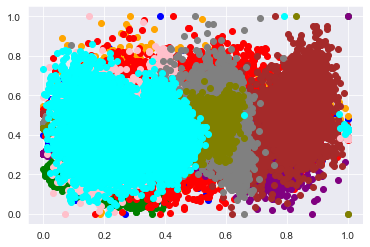

In [32]:
display(pump_arr,colors)

In [7]:
csv = pd.read_csv('03_28/VIB_0328_pump_51200.csv', sep = '\t',
                         names = ['time', 'data'], header = None, encoding = 'CP949').iloc[:47962461,1]

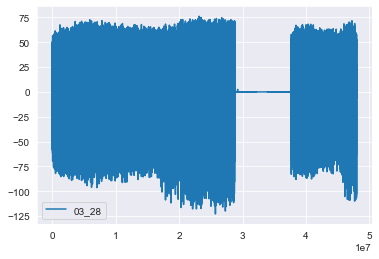

In [23]:
for file,color in zip(pump_arr,colors):
    csv = pd.read_csv(file, sep = '\t',
                         names = ['time', 'data'], header = None, encoding = 'CP949').iloc[:47962461,1]
    plt.plot(csv.index,csv,label =file[:5])
    plt.legend(loc='best')
    plt.savefig(file[6:-4] + ".png")
    plt.show()
    plt.clf()
    plt.close('all')

In [2]:
motor_arr= [
#     'data/processing/motor/temp_0308_motor_51200.csv',
#     'data/processing/motor/temp_0310_motor_51200.csv',
#     'data/processing/motor/temp_0311_motor_51200.csv',
#     'data/processing/motor/temp_0314_motor_51200.csv',
#     'data/processing/motor/temp_0316_motor_51200.csv',
#     'data/processing/motor/temp_0317_motor_51200.csv',
    'data/processing/motor/temp_0321_motor_51200.csv',
    'data/processing/motor/temp_0323_motor_51200.csv',
    'data/processing/motor/temp_0324_motor_51200.csv',
    'data/processing/motor/temp_0328_motor_51200.csv',
    'data/processing/motor/temp_0304_motor_51200.csv',
    'data/processing/motor/temp_0330_motor_51200.csv',
    'data/processing/motor/temp_0331_motor_51200.csv'
    
]

C:\Users\DeepLearning_3\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


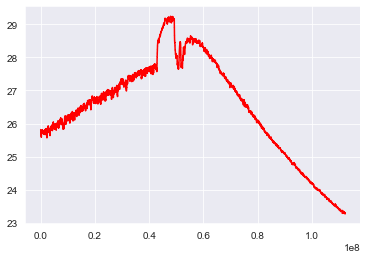

C:\Users\DeepLearning_3\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


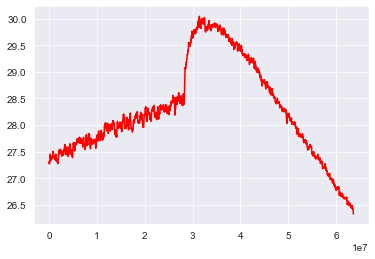

C:\Users\DeepLearning_3\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


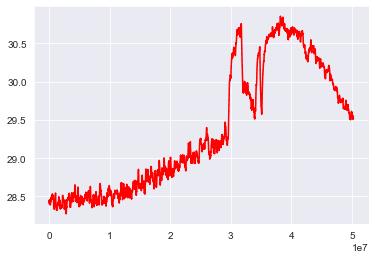

C:\Users\DeepLearning_3\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


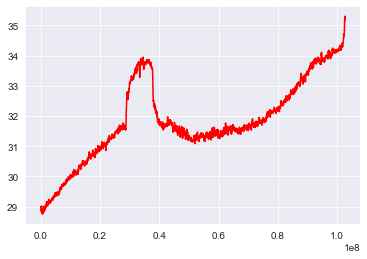

C:\Users\DeepLearning_3\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


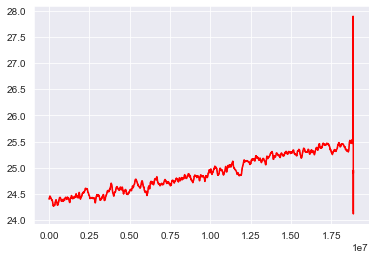

C:\Users\DeepLearning_3\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


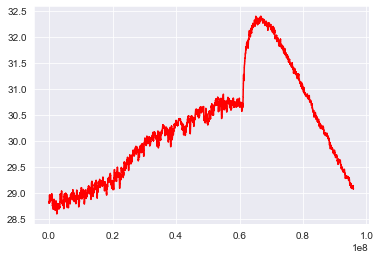

C:\Users\DeepLearning_3\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


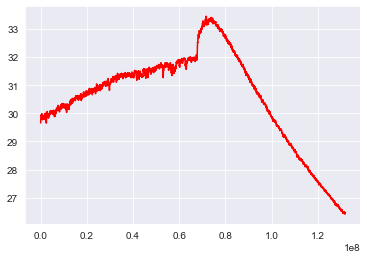

In [3]:
for motor in motor_arr:
    df =  pd.read_csv(motor, sep = '\t', names = ['data'], header = None, encoding = 'CP949').iloc[1:].astype('float')
    df.to_csv(motor,encoding = 'cp949',index = False)
    plt.plot(df.index,df['data'],color='red',label = motor[26:30])
    plt.savefig('temperature/motor/' + motor[21:-4] + ".png")
    plt.show()
    plt.clf()
    plt.close('all')